In [14]:
!pip install numpy
!pip install matplotlib
!pip install torch

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import imageio
import os
from IPython.display import Image, display

Gradient descent is an abstraction of Euler's Method, using multiple variables instead of single variables. Let me first show Euler's method:

In [ ]:
x = []
for i in range(-100,100,1):
    x.append(i/100)
y = np.square(x)
mpl.pyplot.scatter(x,y)
mpl.pyplot.show()

Lets do Euler's Method on $c(w)$, our "cost function" that is just $w^2$. We want to find the minimum of $c(w)$. Each optimization step, we will descend a bit according to the derivative. BThe graph shows the plot of our cost function as the blue line and each descent step as a red dot. After 10 iterations, we are close to the local/global min.
We are doing:
$$c(w)=w^2$$
$$c'(w)=2w$$
Each step:
$$w = w - a \cdot c'(w)$$

In [ ]:
def c(w):
    return w*w
w = 1
gdx=[]
gdy=[]
a=0.1

line = plt.plot(x,y)

from IPython import display

for i in range(10):
    w -= a * 2*w
    gdx.append(w)
    gdy.append(c(w))
    plt.show()
    mpl.pyplot.plot(x,y,'b-',gdx,gdy,'ro')
    time.sleep(0.1)
    display.clear_output(wait=True)

Lets also try with a higher learning rate, a=1.2. We can see that this diverges, because the high learning rate means the graph "jumps" straight past the minimum and onto the other side.

In [ ]:
def c(w):
    return w*w
w = 0.5
gdx=[]
gdy=[]
a=1.2

line = plt.plot(x,y)

from IPython import display

for i in range(10):
    w -= a * 2*w
    gdx.append(w)
    gdy.append(c(w))
    plt.show()
    mpl.pyplot.plot(x,y,'b-',gdx,gdy,'ro')
    time.sleep(0.1)
    display.clear_output(wait=True)

Now, lets start doing linear descent. Similarly, we will still be trying to minimize a cost function $c(w)$ using its derivative.

In [ ]:
'''generate some test data. Should give us the weights [3,4] since the equation is 3x+4'''
x = np.random.randn(100,1)
y = 4 +3 * x + np.random.randn(100,1)
mpl.pyplot.scatter(x,y)
mpl.pyplot.show()

In this case, where $\Theta$ is the coefficients to our model and $x$ and $y$ are our x- and y- values shown above, our cost function is $$c(\Theta) = \frac{1}{n}\sum^{n}_{i=0} (\text{error})^2$$ $$\text{error}=(\Theta_1\cdot x_i + \Theta_2) - y_i$$The $(\Theta_1\cdot x_i + \Theta_2)$ is the linear prediction function we are optimizing, and the cost function is simply the mean squared error between the value of that prediction and our actual y-value.

Using gradient instead of derivative, with respect to $\Theta$: $$\nabla c = \frac{1}{n} \sum^{n}_{i=0} 2\cdot\text{error}\cdot \begin{bmatrix}x_i\\1\end{bmatrix}$$

So now, we just descend in the direction of the gradient every step. Where $a$ is the learning rate, we perform every step: $$\Theta = \Theta - a \cdot \nabla c$$

In [65]:
def gradient_descent(x,y,theta,learningrate,iterations):
    n = len(y)
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros((iterations,2))
    
    for i in range(iterations):
        
        prediction=np.dot(x,theta)
        step = (1/n) * learningrate * (x.T.dot((prediction-y)))
        theta = theta - step
        theta_hist[i] = theta.T
        cost_hist[i] = (1/(n)) * np.sum(np.square(prediction - y))
    
    return theta, cost_hist, theta_hist

In [66]:
x = np.random.randn(100,1)
y = 4 + 3*x + np.random.randn(100,1)

theta = np.random.randn(2,1)
x_b = np.c_[x,np.ones((len(x),1))]
theta, c_h, t_h = gradient_descent(x_b, y, theta, 0.01, 1000)

print(theta)

[[2.9384844 ]
 [3.95267165]]


We can see that our theta is close to what it should be. Now, lets plot cost history against iterations. Remember that cost history here plays the same role as the values of the cost function from Euler's Method example. Since the "network architecture" is literally $y=mx+b$, our graph follows a very nice shape, but as network architecture grows more complicated this graph will be more helpful.

In [ ]:
mpl.pyplot.scatter(range(len(c_h)),c_h)

Now lets apply this onto a physics example.

Lets look at a simple harmonic oscillator, with the differential equation $$\frac{d^2x}{dt^2}=-\frac{k}{m}x$$  and initial conditions $x(0)=1$, $x'(0)=0$. From physics, we know that the solution should be $$\cos{(\frac{k}{m} t)}$$

Generate some test data points with some noise:

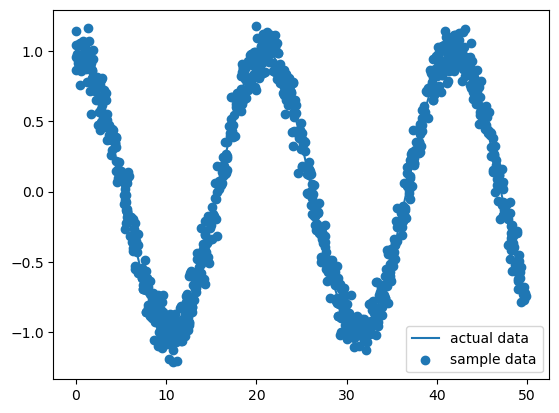

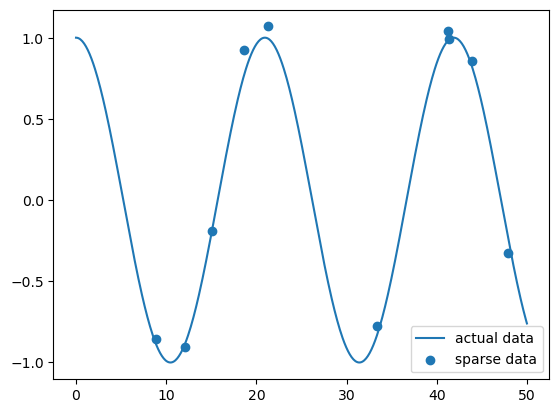

In [98]:
torch.manual_seed(69)
k=0.3
m=1

x=torch.linspace(0, 50, 500)
x_reshaped=torch.reshape(x, (500,1))
x=torch.linspace(0, 50, 500)
y=torch.cos(k/m * x)

x_data = torch.rand(1000)*50
y_data = torch.cos(k/m * x_data)
error = torch.randn_like(y_data)*0.1
y_data = error + y_data

x_data=torch.reshape(x_data,(1000, 1))
y_data=torch.reshape(y_data,(1000, 1))

x_sparse_data = torch.rand(10)*50
y_sparse_data = torch.cos(k/m * x_sparse_data)
error = torch.randn_like(y_sparse_data)*0.1
y_sparse_data = error + y_sparse_data

x_sparse_data=torch.reshape(x_sparse_data,(10, 1))
y_sparse_data=torch.reshape(y_sparse_data,(10, 1))

plt.plot(x,y, label='actual data')
plt.scatter(x_data, y_data, label='sample data')
plt.legend()
plt.show()

plt.plot(x,y, label='actual data')
plt.scatter(x_sparse_data, y_sparse_data, label='sparse data')
plt.legend()
plt.show()

As mentioned above, machine learning usually uses more complex networks, with much more parameters. One such example would be the fully connected neural network structure, as shown in the image below. 
![asdf](img/FCN.png)
"Fully connected" in this case means that each node in each layer takes every node in the previous layer into account. If $x_i$ is a node in a layer, it can be represented as $f(y_1, y_2, ..., y_i)$ where $f$ is a nonlinear function and $y$ is the previous layer. Although the function is much more complicated, we still have a function with inputs, and learnable parameters. We will compute the cost function as the mean squared error of our function predictions compared to the actual data, and calculate the gradient of this cost function with respect to the learnable parameters. Since the function is so complicated, there is no way of computing the gradient by hand, so autodifferentiation (letting the computer do it for us) is used. Ultimately, this is still the same "finding the minima" problem.

The following class defines a network structure of a input of dimension N_INPUT, then N_LAYERS hidden layers with dimensions N_HIDDEN, then a output with dimension N_OUTPUT. So basically in the diagram above, the first column with have N_INPUT circles, then N_LAYERS columns with N_HIDDEN circles, then the last column with N_OUTPUT circles. Each circle would be some linear combination of all the circles on the previous column, with a Tanh() run on it.

In [94]:
#just gonna borrow this code from chat gpt (i checked it trust)
class FCN(nn.Module):
    "Defines a connected network"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super(FCN, self).__init__()
        activation = nn.Tanh
        
        # First layer: Input to first hidden layer
        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()
        )
        
        # Hidden layers
        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_HIDDEN, N_HIDDEN),
                activation()
            ) for _ in range(N_LAYERS - 1)
        ])
        
        # Final layer: Last hidden layer to output
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.fcs(x)
        for layer in self.fch:
            x = layer(x)
        x = self.fce(x)
        return x


ok training time

/var/folders/z8/j77tr4p55pd3hh0bbjldtz3h0000gn/T/ipykernel_5455/2954656526.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


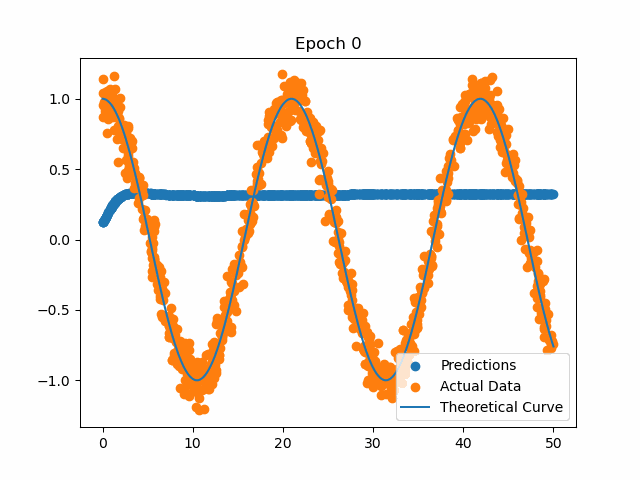

In [101]:
model = FCN(1, 1, 32, 3)

os.makedirs('plots', exist_ok=True)
filenames = []

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
for i in range(501):
    optimizer.zero_grad()
    output = model(x_data)
    loss = torch.mean((output-y_data)**2)
    loss.backward()
    optimizer.step()
    
    if i%50 == 0:
        plt.scatter(x_data.detach().numpy(),output.detach().numpy(), label='Predictions')
        plt.scatter(x_data, y_data, label='Actual Data')
        plt.plot(x,y, label='Theoretical Curve')
        plt.legend()
        plt.title(f'Epoch {i}')
        plt.savefig(f'plots/epoch_{i}.png')
        filenames.append(f'plots/epoch_{i}.png')
        plt.close()
        
with imageio.get_writer('animated_FCN_normal_plot.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)
        
display(Image(filename='animated_FCN_normal_plot.gif'))

/var/folders/z8/j77tr4p55pd3hh0bbjldtz3h0000gn/T/ipykernel_5455/3152945694.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


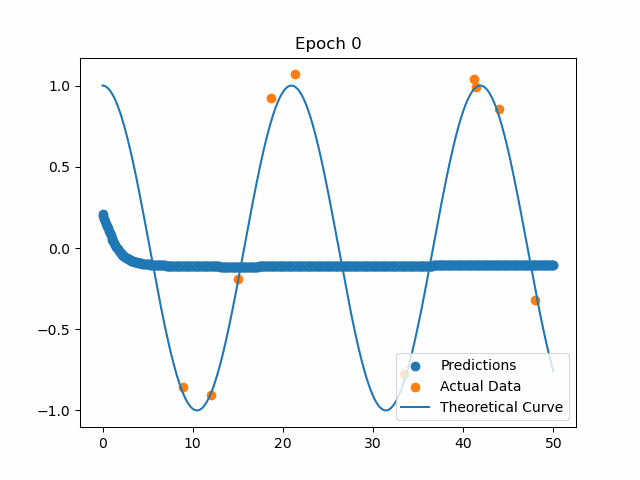

In [105]:
model = FCN(1, 1, 32, 3)

os.makedirs('plots', exist_ok=True)
filenames = []

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
for i in range(501):
    optimizer.zero_grad()
    output = model(x_sparse_data)
    loss = torch.mean((output-y_sparse_data)**2)
    loss.backward()
    optimizer.step()
    
    if i%50 == 0:
        plt.scatter(x_reshaped.detach().numpy(),model(x_reshaped).detach().numpy(), label='Predictions')
        plt.scatter(x_sparse_data, y_sparse_data, label='Actual Data')
        plt.plot(x,y, label='Theoretical Curve')
        plt.legend()
        plt.title(f'Epoch {i}')
        plt.savefig(f'plots/epoch_{i}.png')
        filenames.append(f'plots/epoch_{i}.png')
        plt.close()
        
with imageio.get_writer('animated_FCN_sparse_plot.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)
        
display(Image(filename='animated_FCN_sparse_plot.gif'))

As you can see above, the FCN (fully connected network) with 3 layers can  effectively approximate the periodic function for a short while, but it requires a lot of data to work. However, when not many data points are present (as shown in the second example) it cannot approximate the underlying theoretical curve very well. And why should it? We need to somehow incorporate knowledge about the physical situation for a model to have enough information.?

A PINN (Physics Informed Neural Network) is capable of using information from known differential equation, which is used as an additional term in its cost function that it is attempting to minimize. 

tensor([[-0.3503]])
tensor([[41.9893],
        [40.2075],
        [ 6.0667],
        [26.5460],
        [33.2324],
        [20.3871],
        [ 4.4385],
        [12.1446],
        [35.2669],
        [31.0822]])
